In [1]:
from Bio.PDB import PDBParser, Superimposer, PPBuilder
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# Load structures
parser = PDBParser(QUIET=True)
structure1 = parser.get_structure("pred", "../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb")
structure2 = parser.get_structure("wt", "../pdb/3PL1-PZA.pdb")

In [3]:
# Select atoms (e.g., CA atoms of the first chain)
def get_ca_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    return [res["CA"] for res in chain if "CA" in res][:185]

In [4]:
def get_all_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    atoms = []
    for residue in chain:
        if residue.id[0] == " ":  # Exclude heteroatoms and water
            for atom in residue:
                atoms.append(atom)
    return atoms[:1372]

In [5]:
atoms1 = get_ca_atoms(structure1)
atoms2 = get_ca_atoms(structure2)
# atoms1 = get_all_atoms(structure1)
# atoms2 = get_all_atoms(structure2)

In [6]:
len(atoms1), len(atoms2)

(185, 185)

In [7]:
# Superimpose and compute RMSD
sup = Superimposer()
sup.set_atoms(atoms1, atoms2)
sup.apply(structure2.get_atoms())  # Optional: apply transformation

print(f"RMSD: {sup.rms:.3f} Å")

RMSD: 0.475 Å


In [8]:
prefix = "021_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb".split('_')[0]
prefix

'021'

In [9]:
# wt = get_all_atoms(structure2)
wt = get_ca_atoms(structure2)


def get_rmsds(folder, wt_atoms):
    rmsds = {}
    files = [f for f in os.listdir(folder) if f.endswith('.pdb')]
    for file in files:
                
        atoms = get_ca_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        # atoms = get_all_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        
        assert len(atoms) == len(wt_atoms)
        
        sup = Superimposer()
        sup.set_atoms(atoms, wt_atoms)
        # sup.apply(structure2.get_atoms())  # Optional: apply transformation

        sample = file.split('_')[0]
        
        rmsds[sample] = sup.rms
        
        print(f"RMSD: {sup.rms:.3f} Å")
        
    return rmsds

In [10]:
get_rmsds("../pdb/test_pza", wt)

RMSD: 0.522 Å
RMSD: 0.472 Å
RMSD: 0.495 Å
RMSD: 0.559 Å
RMSD: 0.490 Å
RMSD: 0.506 Å
RMSD: 0.489 Å
RMSD: 0.489 Å
RMSD: 0.479 Å
RMSD: 0.481 Å
RMSD: 0.493 Å
RMSD: 0.486 Å
RMSD: 0.502 Å
RMSD: 0.507 Å
RMSD: 0.486 Å
RMSD: 0.520 Å
RMSD: 0.499 Å
RMSD: 0.512 Å
RMSD: 0.485 Å
RMSD: 0.486 Å
RMSD: 0.503 Å
RMSD: 0.496 Å
RMSD: 0.496 Å
RMSD: 0.492 Å
RMSD: 0.489 Å
RMSD: 0.532 Å
RMSD: 0.488 Å
RMSD: 0.459 Å
RMSD: 0.528 Å
RMSD: 0.507 Å
RMSD: 0.507 Å
RMSD: 0.513 Å
RMSD: 0.495 Å
RMSD: 0.507 Å
RMSD: 0.491 Å
RMSD: 0.504 Å
RMSD: 0.474 Å
RMSD: 0.510 Å
RMSD: 0.497 Å
RMSD: 0.506 Å
RMSD: 0.541 Å
RMSD: 0.484 Å
RMSD: 0.527 Å
RMSD: 0.475 Å
RMSD: 0.490 Å
RMSD: 0.479 Å
RMSD: 0.503 Å
RMSD: 0.479 Å
RMSD: 0.558 Å
RMSD: 0.493 Å
RMSD: 0.482 Å
RMSD: 0.492 Å
RMSD: 0.497 Å
RMSD: 0.492 Å
RMSD: 0.505 Å
RMSD: 0.501 Å
RMSD: 0.538 Å
RMSD: 0.502 Å
RMSD: 0.612 Å
RMSD: 0.489 Å
RMSD: 0.490 Å
RMSD: 0.476 Å
RMSD: 0.482 Å
RMSD: 0.780 Å
RMSD: 0.514 Å
RMSD: 0.505 Å
RMSD: 0.487 Å
RMSD: 0.506 Å
RMSD: 0.492 Å
RMSD: 0.501 Å
RMSD: 0.496 Å
RMSD: 

{'103': 0.5223493901649842,
 '91': 0.47206907336811393,
 '19': 0.4946270393743951,
 '114': 0.5589680232659214,
 '140': 0.4897547263481207,
 '181': 0.5062452504527073,
 '101': 0.488603492878531,
 '16': 0.48928742872330067,
 '102': 0.4785328955742017,
 '88': 0.480724727198626,
 '27': 0.49288980156050843,
 '129': 0.48579691832002264,
 '74': 0.5022104747788821,
 '20': 0.5066239878848462,
 '13': 0.48550073547718436,
 '121': 0.5201182863504582,
 '120': 0.49917864888754826,
 '123': 0.511552512972605,
 '67': 0.48520260870749615,
 '146': 0.48638362260740664,
 '105': 0.5031962403285846,
 '78': 0.49634274032155073,
 '98': 0.49576218800693983,
 '89': 0.49212516735689876,
 '182': 0.48882250945120204,
 '158': 0.5320335710898817,
 '133': 0.4880313320619902,
 '188': 0.4592541985638619,
 '195': 0.5278865809703095,
 '40': 0.5073566610591872,
 '142': 0.5068522761398965,
 '10': 0.5126347285539414,
 '58': 0.4953550254206005,
 '95': 0.5072814195334145,
 '198': 0.49137386803048533,
 '52': 0.5040246436477314,

In [11]:
get_rmsds("../pdb/train_pza", wt)

RMSD: 0.492 Å
RMSD: 0.537 Å
RMSD: 0.488 Å
RMSD: 0.492 Å
RMSD: 0.497 Å
RMSD: 0.474 Å
RMSD: 0.477 Å
RMSD: 0.502 Å
RMSD: 0.528 Å
RMSD: 0.540 Å
RMSD: 0.493 Å
RMSD: 0.485 Å
RMSD: 0.492 Å
RMSD: 0.498 Å
RMSD: 0.495 Å
RMSD: 0.497 Å
RMSD: 0.511 Å
RMSD: 0.487 Å
RMSD: 0.499 Å
RMSD: 0.490 Å
RMSD: 0.502 Å
RMSD: 0.515 Å
RMSD: 0.488 Å
RMSD: 0.478 Å
RMSD: 0.492 Å
RMSD: 0.501 Å
RMSD: 0.486 Å
RMSD: 0.505 Å
RMSD: 0.489 Å
RMSD: 0.481 Å
RMSD: 0.481 Å
RMSD: 0.483 Å
RMSD: 0.497 Å
RMSD: 0.479 Å
RMSD: 0.483 Å
RMSD: 0.504 Å
RMSD: 0.564 Å
RMSD: 0.487 Å
RMSD: 0.494 Å
RMSD: 0.467 Å
RMSD: 0.486 Å
RMSD: 0.505 Å
RMSD: 0.472 Å
RMSD: 0.499 Å
RMSD: 0.490 Å
RMSD: 0.492 Å
RMSD: 0.488 Å
RMSD: 0.474 Å
RMSD: 0.443 Å
RMSD: 0.485 Å
RMSD: 0.497 Å
RMSD: 0.488 Å
RMSD: 0.499 Å
RMSD: 0.498 Å
RMSD: 0.500 Å
RMSD: 0.485 Å
RMSD: 0.507 Å
RMSD: 0.490 Å
RMSD: 0.486 Å
RMSD: 0.515 Å
RMSD: 0.467 Å
RMSD: 0.513 Å
RMSD: 0.487 Å
RMSD: 0.495 Å
RMSD: 0.498 Å
RMSD: 0.481 Å
RMSD: 0.497 Å
RMSD: 0.499 Å
RMSD: 0.502 Å
RMSD: 0.498 Å
RMSD: 0.548 Å
RMSD: 

{'108': 0.49239540495368644,
 '457': 0.5366818373052946,
 '103': 0.4880104461258935,
 '428': 0.49202785264530446,
 '429': 0.4971804409924991,
 '369': 0.47439754545601565,
 '19': 0.477151769225237,
 '140': 0.5023718053014848,
 '248': 0.5282316702847792,
 '181': 0.5396154833405516,
 '101': 0.49322768083591406,
 '386': 0.485285835150305,
 '319': 0.4918898096523412,
 '443': 0.4982751161546227,
 '16': 0.49468546905108735,
 '102': 0.49663495235991767,
 '245': 0.5109099386633146,
 '417': 0.48668245841345914,
 '256': 0.49931212292035354,
 '361': 0.4896367716500875,
 '88': 0.5019468151101857,
 '322': 0.5152760930422398,
 '27': 0.48810264869429576,
 '129': 0.4780624677741786,
 '463': 0.49180434331819306,
 '20': 0.5014834465202579,
 '13': 0.48642483925968966,
 '218': 0.5049187826789344,
 '349': 0.48910561709638667,
 '330': 0.48077064206387854,
 '221': 0.48104729266431656,
 '121': 0.4834600861816255,
 '120': 0.49715511967915116,
 '389': 0.47918209930051997,
 '123': 0.4831626585701105,
 '152': 0.50

In [12]:
get_rmsds("../pdb/wt", wt)

RMSD: 0.503 Å
RMSD: 0.503 Å


{'wt': 0.5028188885906955, 'af': 0.5028097288451695}

### check wt structure is actually wt

In [13]:
import MDAnalysis

protein_structure = MDAnalysis.Universe('../pdb/wt/af_wt.pdb')

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
af_seq = str(protein_structure.residues.sequence().seq)

In [15]:
wt_seq = "MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTAEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS"

In [16]:
wt_seq == af_seq

True

In [17]:
# test on mutated sequence

protein_structure = MDAnalysis.Universe('../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb')
af_seq = str(protein_structure.residues[:186].sequence().seq)
af_seq

/home/ubuntu/.local/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/ubuntu/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


'MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTDEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS'

In [18]:
wt_seq == af_seq

False

### repeat RMSD with AF wt

In [19]:
af_wt_struct = parser.get_structure("wt", '../pdb/wt/af_wt.pdb')
af_wt_atoms = get_ca_atoms(af_wt_struct)
print(len(af_wt_atoms))

185


In [20]:
test_rmsds = get_rmsds("../pdb/test_pza", af_wt_atoms)

RMSD: 0.118 Å
RMSD: 0.095 Å
RMSD: 0.039 Å
RMSD: 0.330 Å
RMSD: 0.031 Å
RMSD: 0.040 Å
RMSD: 0.054 Å
RMSD: 0.090 Å
RMSD: 0.093 Å
RMSD: 0.075 Å
RMSD: 0.068 Å
RMSD: 0.054 Å
RMSD: 0.075 Å
RMSD: 0.148 Å
RMSD: 0.100 Å
RMSD: 0.316 Å
RMSD: 0.092 Å
RMSD: 0.100 Å
RMSD: 0.059 Å
RMSD: 0.068 Å
RMSD: 0.153 Å
RMSD: 0.079 Å
RMSD: 0.120 Å
RMSD: 0.054 Å
RMSD: 0.133 Å
RMSD: 0.226 Å
RMSD: 0.067 Å
RMSD: 0.152 Å
RMSD: 0.334 Å
RMSD: 0.112 Å
RMSD: 0.077 Å
RMSD: 0.247 Å
RMSD: 0.144 Å
RMSD: 0.056 Å
RMSD: 0.048 Å
RMSD: 0.044 Å
RMSD: 0.159 Å
RMSD: 0.121 Å
RMSD: 0.041 Å
RMSD: 0.082 Å
RMSD: 0.207 Å
RMSD: 0.125 Å
RMSD: 0.204 Å
RMSD: 0.131 Å
RMSD: 0.056 Å
RMSD: 0.070 Å
RMSD: 0.045 Å
RMSD: 0.063 Å
RMSD: 0.355 Å
RMSD: 0.064 Å
RMSD: 0.059 Å
RMSD: 0.082 Å
RMSD: 0.153 Å
RMSD: 0.064 Å
RMSD: 0.113 Å
RMSD: 0.057 Å
RMSD: 0.162 Å
RMSD: 0.051 Å
RMSD: 0.250 Å
RMSD: 0.067 Å
RMSD: 0.048 Å
RMSD: 0.078 Å
RMSD: 0.091 Å
RMSD: 0.485 Å
RMSD: 0.133 Å
RMSD: 0.069 Å
RMSD: 0.091 Å
RMSD: 0.055 Å
RMSD: 0.054 Å
RMSD: 0.043 Å
RMSD: 0.235 Å
RMSD: 

In [21]:
train_rmsds = get_rmsds("../pdb/train_pza", af_wt_atoms)

RMSD: 0.069 Å
RMSD: 0.327 Å
RMSD: 0.045 Å
RMSD: 0.043 Å
RMSD: 0.124 Å
RMSD: 0.065 Å
RMSD: 0.172 Å
RMSD: 0.087 Å
RMSD: 0.138 Å
RMSD: 0.223 Å
RMSD: 0.060 Å
RMSD: 0.055 Å
RMSD: 0.085 Å
RMSD: 0.057 Å
RMSD: 0.055 Å
RMSD: 0.061 Å
RMSD: 0.086 Å
RMSD: 0.172 Å
RMSD: 0.071 Å
RMSD: 0.085 Å
RMSD: 0.049 Å
RMSD: 0.203 Å
RMSD: 0.056 Å
RMSD: 0.073 Å
RMSD: 0.044 Å
RMSD: 0.100 Å
RMSD: 0.048 Å
RMSD: 0.040 Å
RMSD: 0.157 Å
RMSD: 0.064 Å
RMSD: 0.062 Å
RMSD: 0.067 Å
RMSD: 0.037 Å
RMSD: 0.071 Å
RMSD: 0.071 Å
RMSD: 0.055 Å
RMSD: 0.243 Å
RMSD: 0.069 Å
RMSD: 0.134 Å
RMSD: 0.200 Å
RMSD: 0.089 Å
RMSD: 0.048 Å
RMSD: 0.182 Å
RMSD: 0.055 Å
RMSD: 0.053 Å
RMSD: 0.069 Å
RMSD: 0.046 Å
RMSD: 0.072 Å
RMSD: 0.204 Å
RMSD: 0.121 Å
RMSD: 0.051 Å
RMSD: 0.096 Å
RMSD: 0.068 Å
RMSD: 0.059 Å
RMSD: 0.112 Å
RMSD: 0.152 Å
RMSD: 0.074 Å
RMSD: 0.059 Å
RMSD: 0.067 Å
RMSD: 0.073 Å
RMSD: 0.149 Å
RMSD: 0.135 Å
RMSD: 0.043 Å
RMSD: 0.053 Å
RMSD: 0.047 Å
RMSD: 0.100 Å
RMSD: 0.071 Å
RMSD: 0.077 Å
RMSD: 0.052 Å
RMSD: 0.045 Å
RMSD: 0.220 Å
RMSD: 

### Analyse RMSDs

In [22]:
test_df = pd.DataFrame(test_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
test_df.index = test_df.index.astype(int)
test_df.sort_index(inplace=True)

train_df = pd.DataFrame(train_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
train_df.index = train_df.index.astype(int)
train_df.sort_index(inplace=True)

In [23]:
train_df.describe()

,RMSD
count,464.000000
mean,0.105008
std,0.068884
min,0.035670
25%,0.059812
50%,0.082174
75%,0.126391
max,0.465885


In [24]:
test_df.describe()

,RMSD
count,200.000000
mean,0.110784
std,0.085925
min,0.030654
25%,0.059968
50%,0.079540
75%,0.127130
max,0.539620


In [25]:
full_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_df.describe()

,RMSD
count,664.000000
mean,0.106748
std,0.074409
min,0.030654
25%,0.059818
50%,0.080798
75%,0.126709
max,0.539620


### Get phenotypes

In [26]:
train_seqs = pd.read_csv('../data/real_train_sequences.csv')
test_seqs = pd.read_csv('../data/real_test_sequences.csv')

In [27]:
train_seqs.phenotype_label

0      S
1      S
2      R
3      S
4      R
      ..
459    S
460    S
461    S
462    S
463    S
Name: phenotype_label, Length: 464, dtype: object

In [28]:
train_df = pd.merge(train_df, train_seqs['phenotype_label'], left_index=True, right_index=True)
test_df = pd.merge(test_df, test_seqs['phenotype_label'], left_index=True, right_index=True)

In [29]:
display(train_df[train_df['phenotype_label'] == 'R'].describe())
display(train_df[train_df['phenotype_label'] == 'S'].describe())

,RMSD
count,246.000000
mean,0.119247
std,0.068614
min,0.038990
25%,0.065983
50%,0.101779
75%,0.148868
max,0.465885


,RMSD
count,218.000000
mean,0.088939
std,0.065724
min,0.035670
25%,0.053650
50%,0.068236
75%,0.094058
max,0.398973


In [30]:
display(test_df[test_df['phenotype_label'] == 'R'].describe())
display(test_df[test_df['phenotype_label'] == 'S'].describe())

,RMSD
count,103.000000
mean,0.127118
std,0.092595
min,0.041159
25%,0.066364
50%,0.094677
75%,0.152333
max,0.539620


,RMSD
count,97.000000
mean,0.093439
std,0.074864
min,0.030654
25%,0.056384
50%,0.067617
75%,0.091190
max,0.397053


In [31]:
train_df['Dataset'] = 'Train Set'
test_df['Dataset'] = 'Test Set'

In [32]:
full_set_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_set_df

,RMSD,phenotype_label,Dataset
0,0.132045,S,Train Set
1,0.090405,S,Train Set
2,0.093664,R,Train Set
3,0.077379,S,Train Set
4,0.253758,R,Train Set
...,...,...,...
659,0.334187,R,Test Set
660,0.082294,S,Test Set
661,0.067970,S,Test Set
662,0.047777,S,Test Set


### Table of mean RMSDs

In [36]:
# full_set_df[(full_set_df['phenotype_label'] == 'R') & (full_set_df['Dataset'] == 'Train Set')]['RMSD'].std()

def get_mean_std_rmsd(phenotype=None, dataset=None):
    subset = full_set_df
    if phenotype:
        subset = subset[subset['phenotype_label'] == phenotype]
    if dataset:
        subset = subset[subset['Dataset'] == dataset]
    print(f"Dataset = {dataset if dataset else 'Full'}. Phenotype = {phenotype if phenotype else 'All'}. \nmean = {subset['RMSD'].mean():.3f}, std = {subset['RMSD'].std():.3f}")

In [37]:
get_mean_std_rmsd()
get_mean_std_rmsd(dataset='Train Set')
get_mean_std_rmsd(dataset='Test Set')
print("\n")
get_mean_std_rmsd(phenotype='R')
get_mean_std_rmsd(phenotype='S')
print("\n")
get_mean_std_rmsd(phenotype='R', dataset='Train Set')
get_mean_std_rmsd(phenotype='S', dataset='Train Set')
print("\n")
get_mean_std_rmsd(phenotype='R', dataset='Test Set')
get_mean_std_rmsd(phenotype='S', dataset='Test Set')

Dataset = Full. Phenotype = All. 
mean = 0.107, std = 0.074
Dataset = Train Set. Phenotype = All. 
mean = 0.105, std = 0.069
Dataset = Test Set. Phenotype = All. 
mean = 0.111, std = 0.086


Dataset = Full. Phenotype = R. 
mean = 0.122, std = 0.076
Dataset = Full. Phenotype = S. 
mean = 0.090, std = 0.069


Dataset = Train Set. Phenotype = R. 
mean = 0.119, std = 0.069
Dataset = Train Set. Phenotype = S. 
mean = 0.089, std = 0.066


Dataset = Test Set. Phenotype = R. 
mean = 0.127, std = 0.093
Dataset = Test Set. Phenotype = S. 
mean = 0.093, std = 0.075


In [38]:
def get_counts(phenotype=None, dataset=None):
    subset = full_set_df
    if phenotype:
        subset = subset[subset['phenotype_label'] == phenotype]
    if dataset:
        subset = subset[subset['Dataset'] == dataset]
    print(f'Dataset = {dataset if dataset else "Full"}. Phenotype = {phenotype if phenotype else "All"}. \nCount = {len(subset)}')

In [39]:
get_counts()
get_counts(dataset='Train Set')
get_counts(dataset='Test Set')
print("\n")
get_counts(phenotype='R')
get_counts(phenotype='S')
print("\n")
get_counts(phenotype='R', dataset='Train Set')
get_counts(phenotype='S', dataset='Train Set')
print("\n")
get_counts(phenotype='R', dataset='Test Set')
get_counts(phenotype='S', dataset='Test Set')

Dataset = Full. Phenotype = All. 
Count = 664
Dataset = Train Set. Phenotype = All. 
Count = 464
Dataset = Test Set. Phenotype = All. 
Count = 200


Dataset = Full. Phenotype = R. 
Count = 349
Dataset = Full. Phenotype = S. 
Count = 315


Dataset = Train Set. Phenotype = R. 
Count = 246
Dataset = Train Set. Phenotype = S. 
Count = 218


Dataset = Test Set. Phenotype = R. 
Count = 103
Dataset = Test Set. Phenotype = S. 
Count = 97


### Sort and choose VMD images by RMSD

In [40]:
display(train_df, test_df)

,RMSD,phenotype_label,Dataset
Sample,,,
0,0.132045,S,Train Set
1,0.090405,S,Train Set
2,0.093664,R,Train Set
3,0.077379,S,Train Set
4,0.253758,R,Train Set
...,...,...,...
459,0.313355,S,Train Set
460,0.067975,S,Train Set
461,0.078040,S,Train Set


,RMSD,phenotype_label,Dataset
Sample,,,
0,0.130500,R,Test Set
1,0.312247,S,Test Set
2,0.113245,R,Test Set
3,0.056384,S,Test Set
4,0.062978,S,Test Set
...,...,...,...
195,0.334187,R,Test Set
196,0.082294,S,Test Set
197,0.067970,S,Test Set


In [41]:
test_muts = pd.read_csv('../data/real_test_sequences.csv')[['phenotype_label', 'mutation']]
train_muts = pd.read_csv('../data/real_train_sequences.csv')[['phenotype_label', 'mutation']]

In [42]:
train_muts.reset_index().rename(columns={'index': 'Sample'})

,Sample,phenotype_label,mutation
0,0,S,A102V
1,1,S,A134D
2,2,R,A134P
3,3,S,A134S
4,4,R,A134V
...,...,...,...
459,459,S,Y34H
460,460,S,Y64N
461,461,S,Y95H
462,462,S,Y99C


In [43]:
train_df_w_mut = train_df.reset_index().merge(
    train_muts.reset_index().rename(columns={'index': 'Sample'}), on=['phenotype_label', 'Sample'])

test_df_w_mut = test_df.reset_index().merge(
    test_muts.reset_index().rename(columns={'index': 'Sample'}), on=['phenotype_label', 'Sample'])

In [44]:
train_df_w_mut.set_index('Sample', inplace=True)
test_df_w_mut.set_index('Sample', inplace=True)


In [45]:
full_set_df_w_mut = pd.concat([train_df_w_mut, test_df_w_mut]).reset_index()

In [46]:
full_set_df_w_mut.sort_values(by='RMSD', ascending=False, inplace=True)

In [47]:
display(full_set_df_w_mut.head(10))
display(full_set_df_w_mut.tail(10))

,Sample,RMSD,phenotype_label,Dataset,mutation
628,164,0.539620,R,Test Set,T142R
572,108,0.484756,R,Test Set,L172P
431,431,0.465885,R,Train Set,V180F
545,81,0.420554,R,Test Set,G97V
35,35,0.398973,S,Train Set,A39E
579,115,0.397053,S,Test Set,L35R
91,91,0.387320,S,Train Set,D40E
334,334,0.376910,S,Train Set,S185C
580,116,0.376015,S,Test Set,L35V
411,411,0.371025,R,Train Set,V131F


,Sample,RMSD,phenotype_label,Dataset,mutation
9,9,0.039887,S,Train Set,A152S
267,267,0.039259,S,Train Set,N112H
172,172,0.039088,S,Train Set,G60R
332,332,0.038990,R,Train Set,S179N
483,19,0.038981,S,Test Set,A79S
663,199,0.038383,S,Test Set,Y99F
85,85,0.037669,S,Train Set,D166H
120,120,0.037428,S,Train Set,E111K
356,356,0.035670,S,Train Set,S84C
604,140,0.030654,S,Test Set,Q141E


In [48]:
# steps

# get file names for top and bottom 10 RMSDs renders
# generate png images with labels with 'convert' :  Index - mutation - R/S - RMSD - train/test
# Colour each part of text label differently
# 'montage' : 5 columns 4 rows

In [49]:
for _, row in full_set_df_w_mut[:10].iterrows():
    sample = row['Sample']
    mutation = row['mutation']
    phenotype = row['phenotype_label']
    rmsd = row['RMSD']
    dataset = row['Dataset'].split()[0]
    # dataset = row['Dataset']
    
    label = f"{dataset} {sample}\n{mutation} - {phenotype} - {rmsd:.3f} Å"
    
    # # Create a simple plot with the label
    # plt.figure(figsize=(10, 2))
    # plt.text(0.5, 0.5, label, fontsize=12, ha='center', va='center')
    # plt.axis('off')
    
    # plt.show()
    
    print(label, '\n')

Test 164
T142R - R - 0.540 Å 

Test 108
L172P - R - 0.485 Å 

Train 431
V180F - R - 0.466 Å 

Test 81
G97V - R - 0.421 Å 

Train 35
A39E - S - 0.399 Å 

Test 115
L35R - S - 0.397 Å 

Train 91
D40E - S - 0.387 Å 

Train 334
S185C - S - 0.377 Å 

Test 116
L35V - S - 0.376 Å 

Train 411
V131F - R - 0.371 Å 



In [50]:
for _, row in full_set_df_w_mut.tail(10).iterrows():
    sample = row['Sample']
    mutation = row['mutation']
    phenotype = row['phenotype_label']
    rmsd = row['RMSD']
    dataset = row['Dataset'].split()[0]
    # dataset = row['Dataset']
    
    label = f"{dataset} {sample}\n{mutation} - {phenotype} - {rmsd:.3f} Å"
    
    # # Create a simple plot with the label
    # plt.figure(figsize=(10, 2))
    # plt.text(0.5, 0.5, label, fontsize=12, ha='center', va='center')
    # plt.axis('off')
    
    # plt.show()
    
    print(label, '\n')

Train 9
A152S - S - 0.040 Å 

Train 267
N112H - S - 0.039 Å 

Train 172
G60R - S - 0.039 Å 

Train 332
S179N - R - 0.039 Å 

Test 19
A79S - S - 0.039 Å 

Test 199
Y99F - S - 0.038 Å 

Train 85
D166H - S - 0.038 Å 

Train 120
E111K - S - 0.037 Å 

Train 356
S84C - S - 0.036 Å 

Test 140
Q141E - S - 0.031 Å 



In [51]:
import os

def rename_files(dataset):
    for file in os.listdir(f'../pdb/{dataset}_structures/renders'):
        if file.endswith('.png'):
            prefix = file.split('_')[0]
            
            # print(prefix)
            # print(f'changing ../pdb/{dataset}_structures/renders/{file} to ../pdb/{dataset}_structures/renders/{prefix}.png')
            
            os.rename(f'../pdb/{dataset}_structures/renders/{file}', f'../pdb/{dataset}_structures/renders/{prefix}.png')

In [52]:
# rename_files('train')

In [53]:
for _, row in full_set_df_w_mut.head(10).iterrows():
    number = row['Sample']
    folder = 'train_structures' if row['Dataset'] == 'Train Set' else 'test_structures'
    
    path = f'{folder}/renders/{number}.png'
    print('\\' + path + ' \\')

\test_structures/renders/164.png \
\test_structures/renders/108.png \
\train_structures/renders/431.png \
\test_structures/renders/81.png \
\train_structures/renders/35.png \
\test_structures/renders/115.png \
\train_structures/renders/91.png \
\train_structures/renders/334.png \
\test_structures/renders/116.png \
\train_structures/renders/411.png \


In [54]:
for _, row in full_set_df_w_mut.tail(10).iterrows():
    number = row['Sample']
    folder = 'train_structures' if row['Dataset'] == 'Train Set' else 'test_structures'
    
    path = f'{folder}/renders/{number}.png'
    print('\\' + path + ' \\')

\train_structures/renders/9.png \
\train_structures/renders/267.png \
\train_structures/renders/172.png \
\train_structures/renders/332.png \
\test_structures/renders/19.png \
\test_structures/renders/199.png \
\train_structures/renders/85.png \
\train_structures/renders/120.png \
\train_structures/renders/356.png \
\test_structures/renders/140.png \


## Figures

In [55]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

### Distribution of RMSDs for S and R

Not normal distribution; Mann-Whitney U test

In [56]:
# # Check distribution of RMSD values for S and R phenotypes

# plt.figure(figsize=(8, 6))

# sns.histplot(full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD'], binwidth=0.01, kde=True, color='mediumseagreen', alpha=0.4, 
#              binrange=(0.02, 0.55)
#              )
# sns.histplot(full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD'], binwidth=0.01, kde=True, color='indianred', alpha=0.4, 
#              binrange=(0.02, 0.55)
#              )

# plt.show()

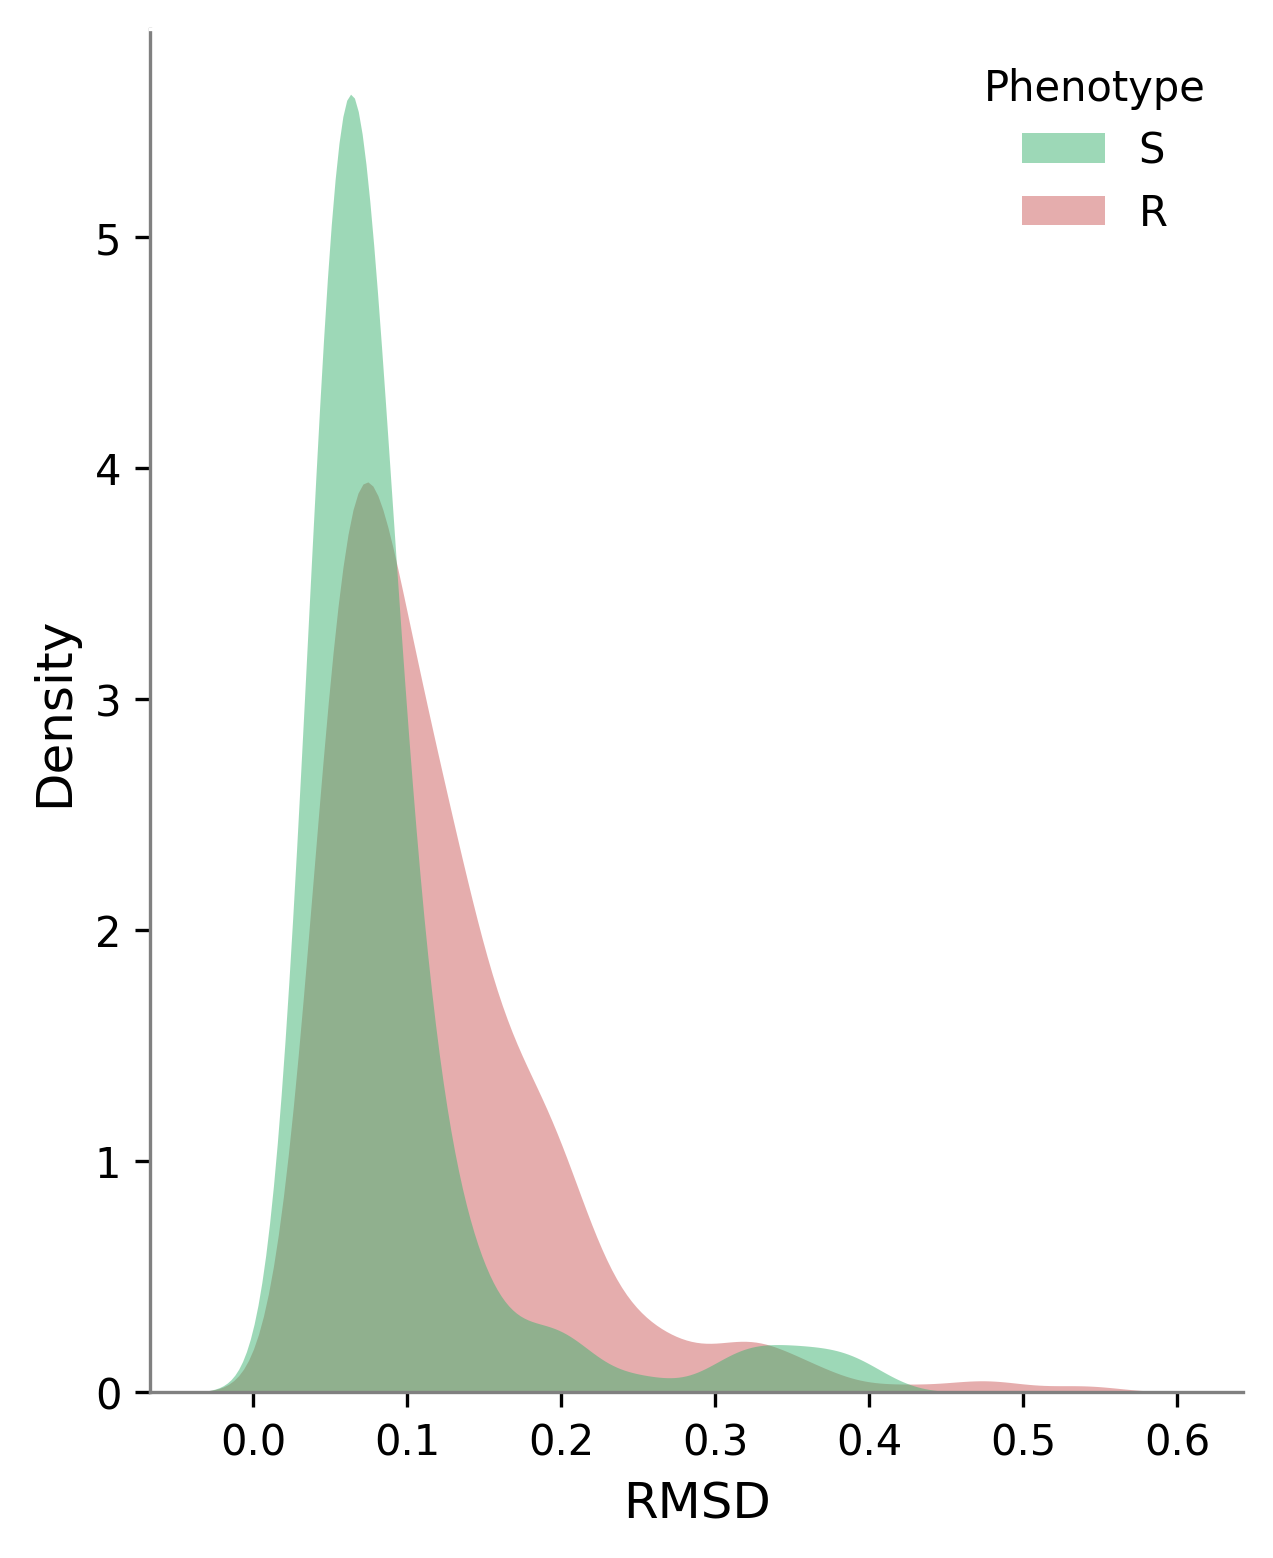

In [57]:
from matplotlib.patches import Patch

# plt.figure(figsize=(8, 6))
# plt.figure(figsize=(4.7, 5.9))

data = full_set_df[['phenotype_label', 'RMSD']].rename(columns={'phenotype_label': 'Phenotype'})

# Define custom legend handles
legend_elements = [
    Patch(facecolor='mediumseagreen', edgecolor='none', label='S', alpha= 0.5),
    Patch(facecolor='indianred', edgecolor='none', label='R', alpha= 0.5)
]

# Create plot (or not—this works standalone)
fig, ax = plt.subplots(figsize=(4.7, 5.9))

# sns.kdeplot(full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD'], color='mediumseagreen', label='S')
# sns.kdeplot(full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD'], color='indianred', label='R')
sns.kdeplot(data, x='RMSD', 
            # multiple='stack', 
            hue='Phenotype',
            palette={'S': 'mediumseagreen', 'R': 'indianred'},
            fill=True,
            common_norm=True,
            linewidth=0,
            alpha=0.5
            )

# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# legend = plt.legend(title='Phenotype', loc='upper right', frameon=False)

# Manually add legend
legend = ax.legend(
    handles=legend_elements,
    title='Phenotype',
    frameon=False,     # Optional: True for border, False to remove
    loc='upper right' # Or whatever position you prefer
)

plt.xlabel('RMSD')
plt.ylabel('Density')
# plt.title('KDE of RMSD Values for S and R Phenotypes')

# plt.savefig('figs/kde_rmsd_s_r_v2.png', dpi=300, bbox_inches='tight')

plt.show()

### Boxplot of RMSDs

Show full dataset
Train
Test
All susceptible
All resistant

In [58]:
from scipy.stats import mannwhitneyu, ttest_ind

# test significance of RMSD differences between S and R

group1 = full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD']
group2 = full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD']

# stat, p_value = ttest_ind(group1, group2)
res = mannwhitneyu(group1, group2)

print(f"p = {res[1]}") # probability of observing a difference as large, assuming the null hypothesis (both groups have the same distribution) is true

p = 3.026279670338045e-15


/tmp/ipykernel_2505867/2428425106.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,


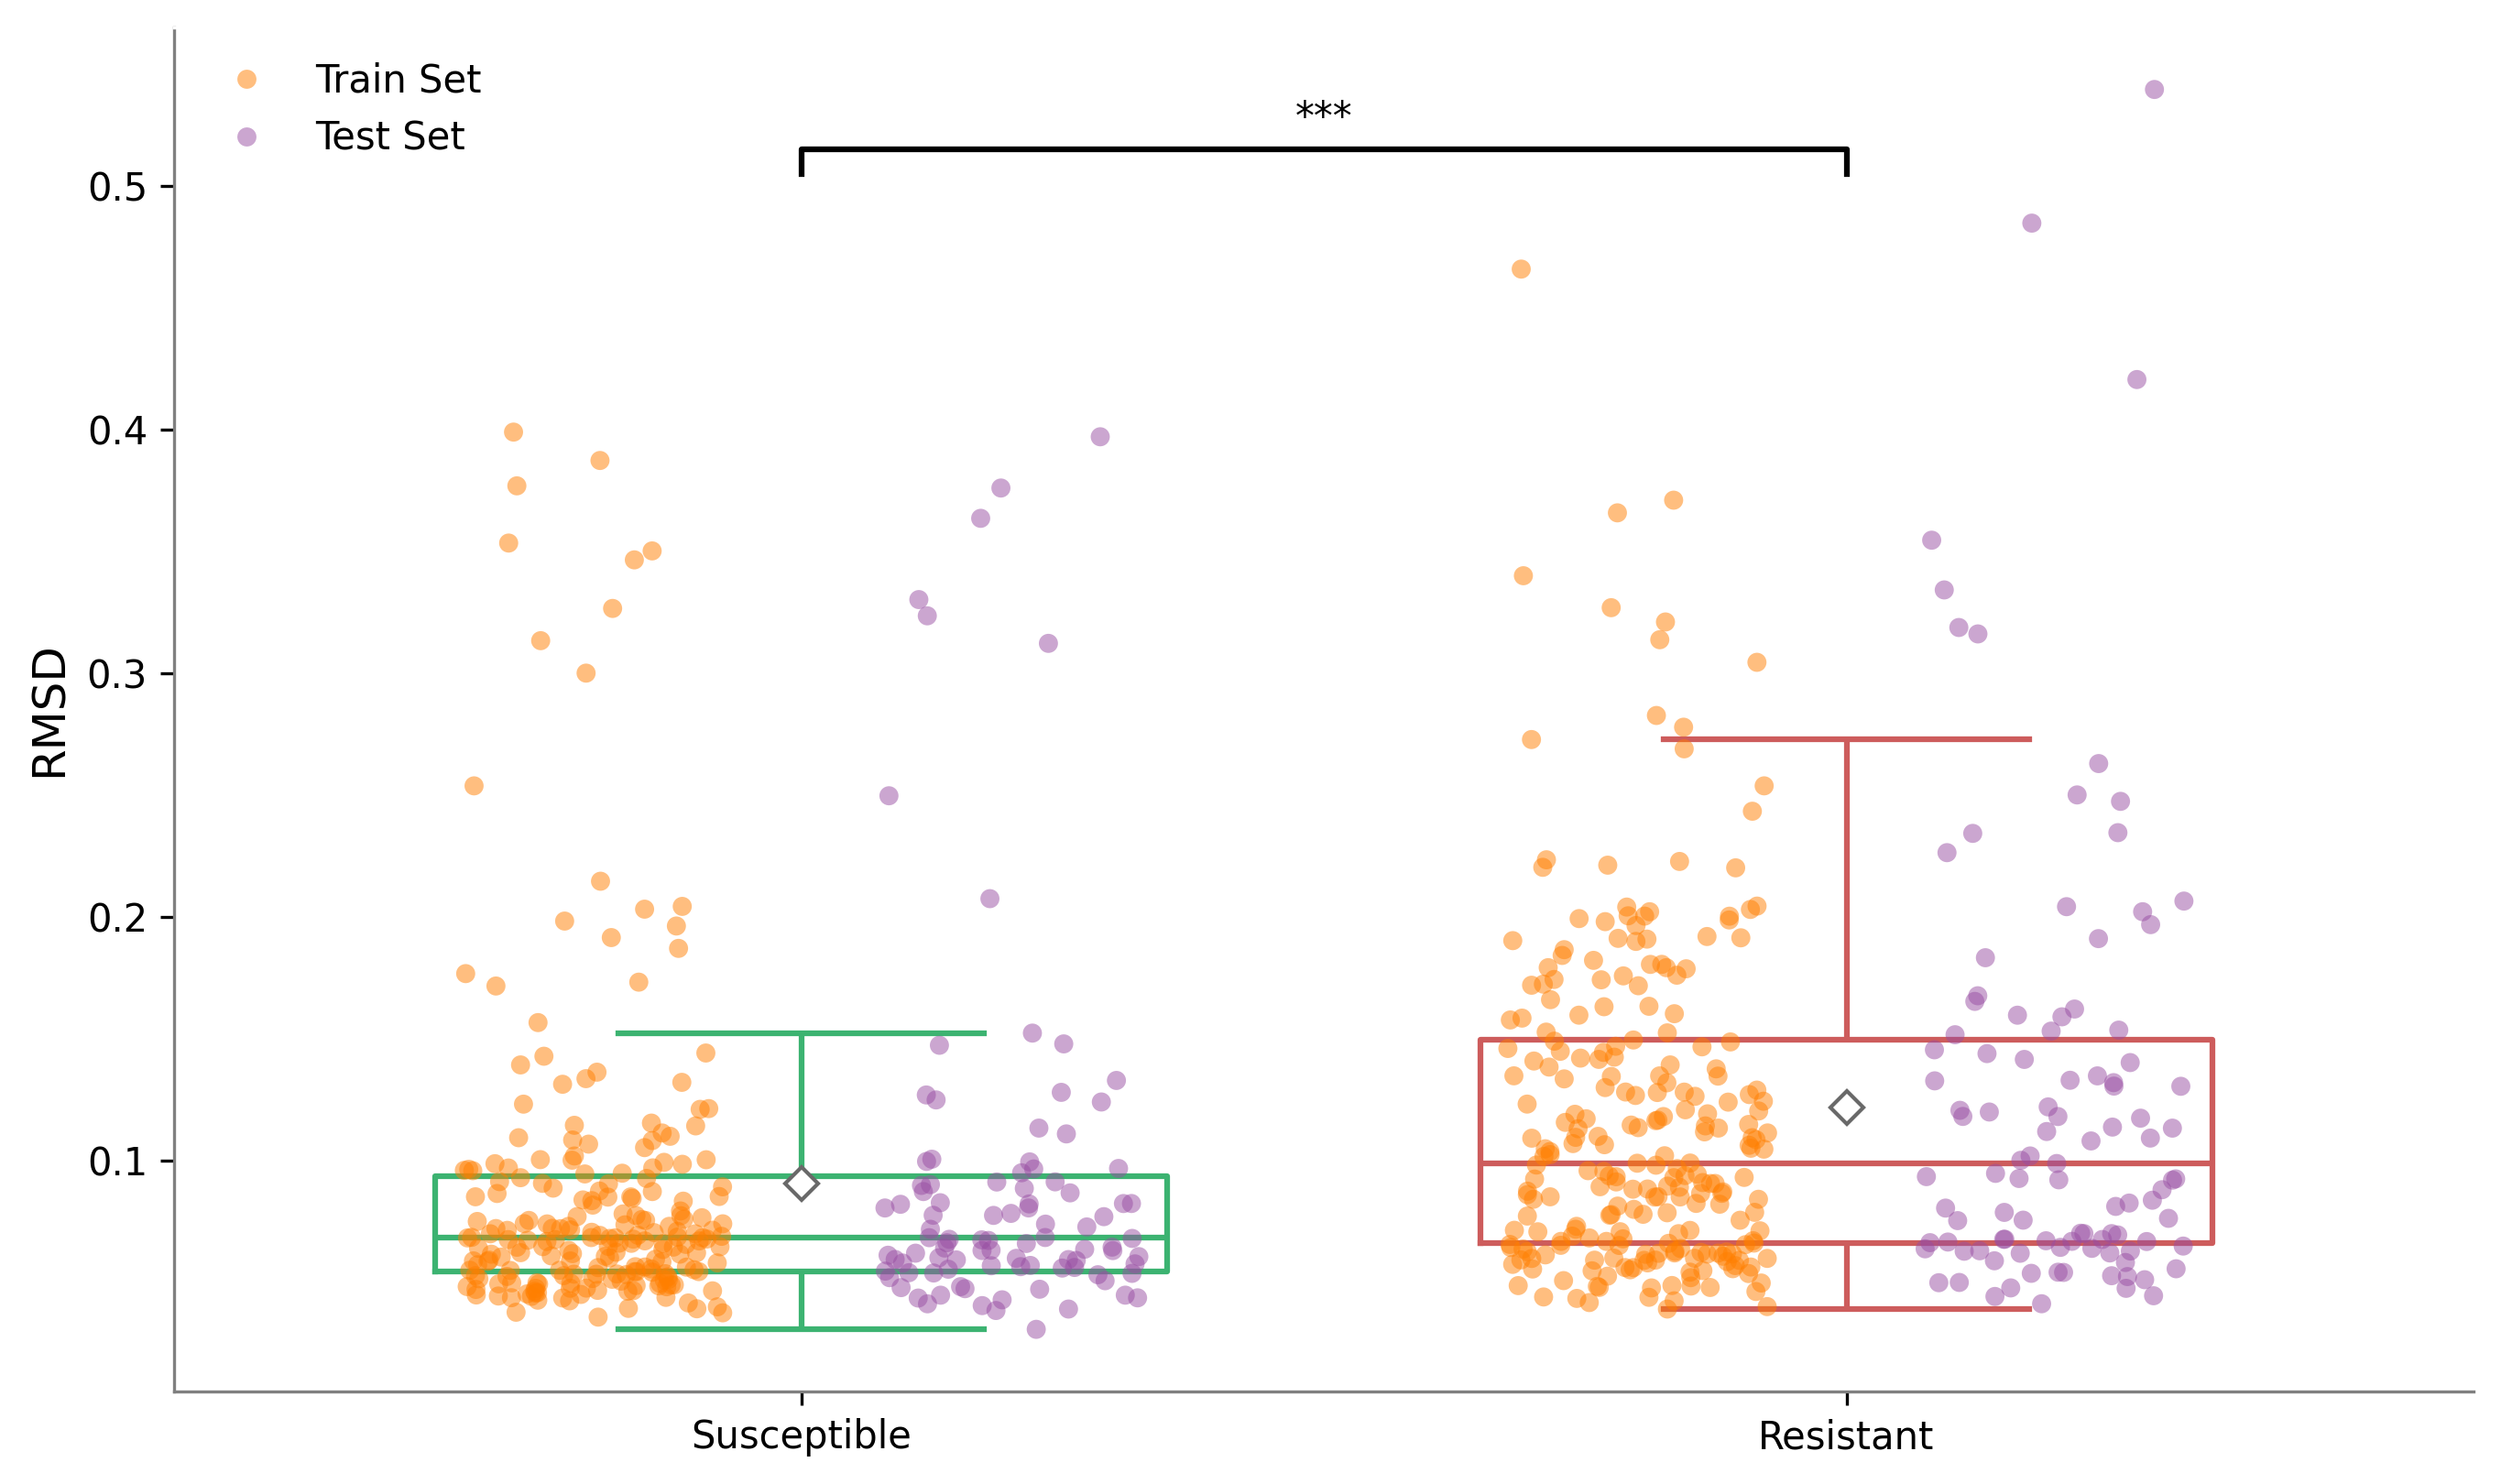

In [ ]:
# plt.figure(figsize=(6.5, 6))
plt.figure(figsize=(9.2, 5.5))

palette = {'S': 'mediumseagreen', 'R': 'indianred'}
# dot_palette = {'Train Set': 'yellowgreen', 'Test Set': 'peru'}
dot_palette = {'Train Set': '#ff7f00', 'Test Set': '#984ea3'}


sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,
            width=0.7,
            fill=False,
            meanprops={'marker':'D', 'markerfacecolor':'white',
                       'markeredgecolor':'dimgray', 'linestyle':'--'},
            showfliers=False,
        #     boxprops={'edgecolor': 'white'},
            # medianprops={
                # 'color': 'whitesmoke', 
                # 'linewidth': 1.5
                # },
        #     whiskerprops={'color': 'gray'},
            )


# Add jittered dots, colored by 'Category'
sns.stripplot(data=full_set_df, x='phenotype_label', y='RMSD', hue='Dataset', palette=dot_palette,
              dodge=True, jitter=0.25, 
              alpha=0.5, 
              size=5)

# plt.yticks(np.arange(0, 0.6, 0.05))
plt.xticks(ticks=[0, 1], labels=['Susceptible', 'Resistant'])

plt.xlim(-0.6, 1.6)

# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


# Add bar to show significant difference due to p-value
x1, x2 = 0, 1   # 'S' and 'R'
# y, h, col = full_set_df['RMSD'].max() + 0.02, 0.01, 'black'
y, h, col = 0.505, 0.01, 'black'

# Draw line and p-value
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h+0.005, f"p = {res[1]}", ha='center', va='bottom', color=col)
plt.text((x1+x2)*.5, y+h+0.005, "***", ha='center', va='bottom', color=col)

# Add gridlines
# plt.grid(color='#f0f0f0', 
#         #  linestyle='--', 
#          linewidth=0.5, 
#          axis='y'
#          )

# # Add annotation for mean values
# mean_values = full_set_df.groupby('phenotype_label')['RMSD'].mean()
# for i, mean in enumerate(mean_values):
#     plt.text(i, mean + 0.01, f"{mean:.3f}", ha='center', va='bottom', fontsize=10, color='dimgray')

# Clean up legend
legend = plt.legend(title='',
        #    bbox_to_anchor=(1, 1), 
           loc='upper left'
           )

legend.set_frame_on(False)

# plt.title('RMSD by Phenotype for all AlphaFold Predicted Structures', fontsize = 14)

plt.xlabel('')
plt.ylabel('RMSD')

plt.tight_layout()

# plt.savefig("figs/af_struct_rmsd_boxplot_v4.png", dpi=300, bbox_inches='tight')

plt.show()


In [60]:
full_set_df.groupby('phenotype_label')['RMSD'].mean()

phenotype_label
R    0.121570
S    0.090325
Name: RMSD, dtype: float64

### RMSD by mutation position

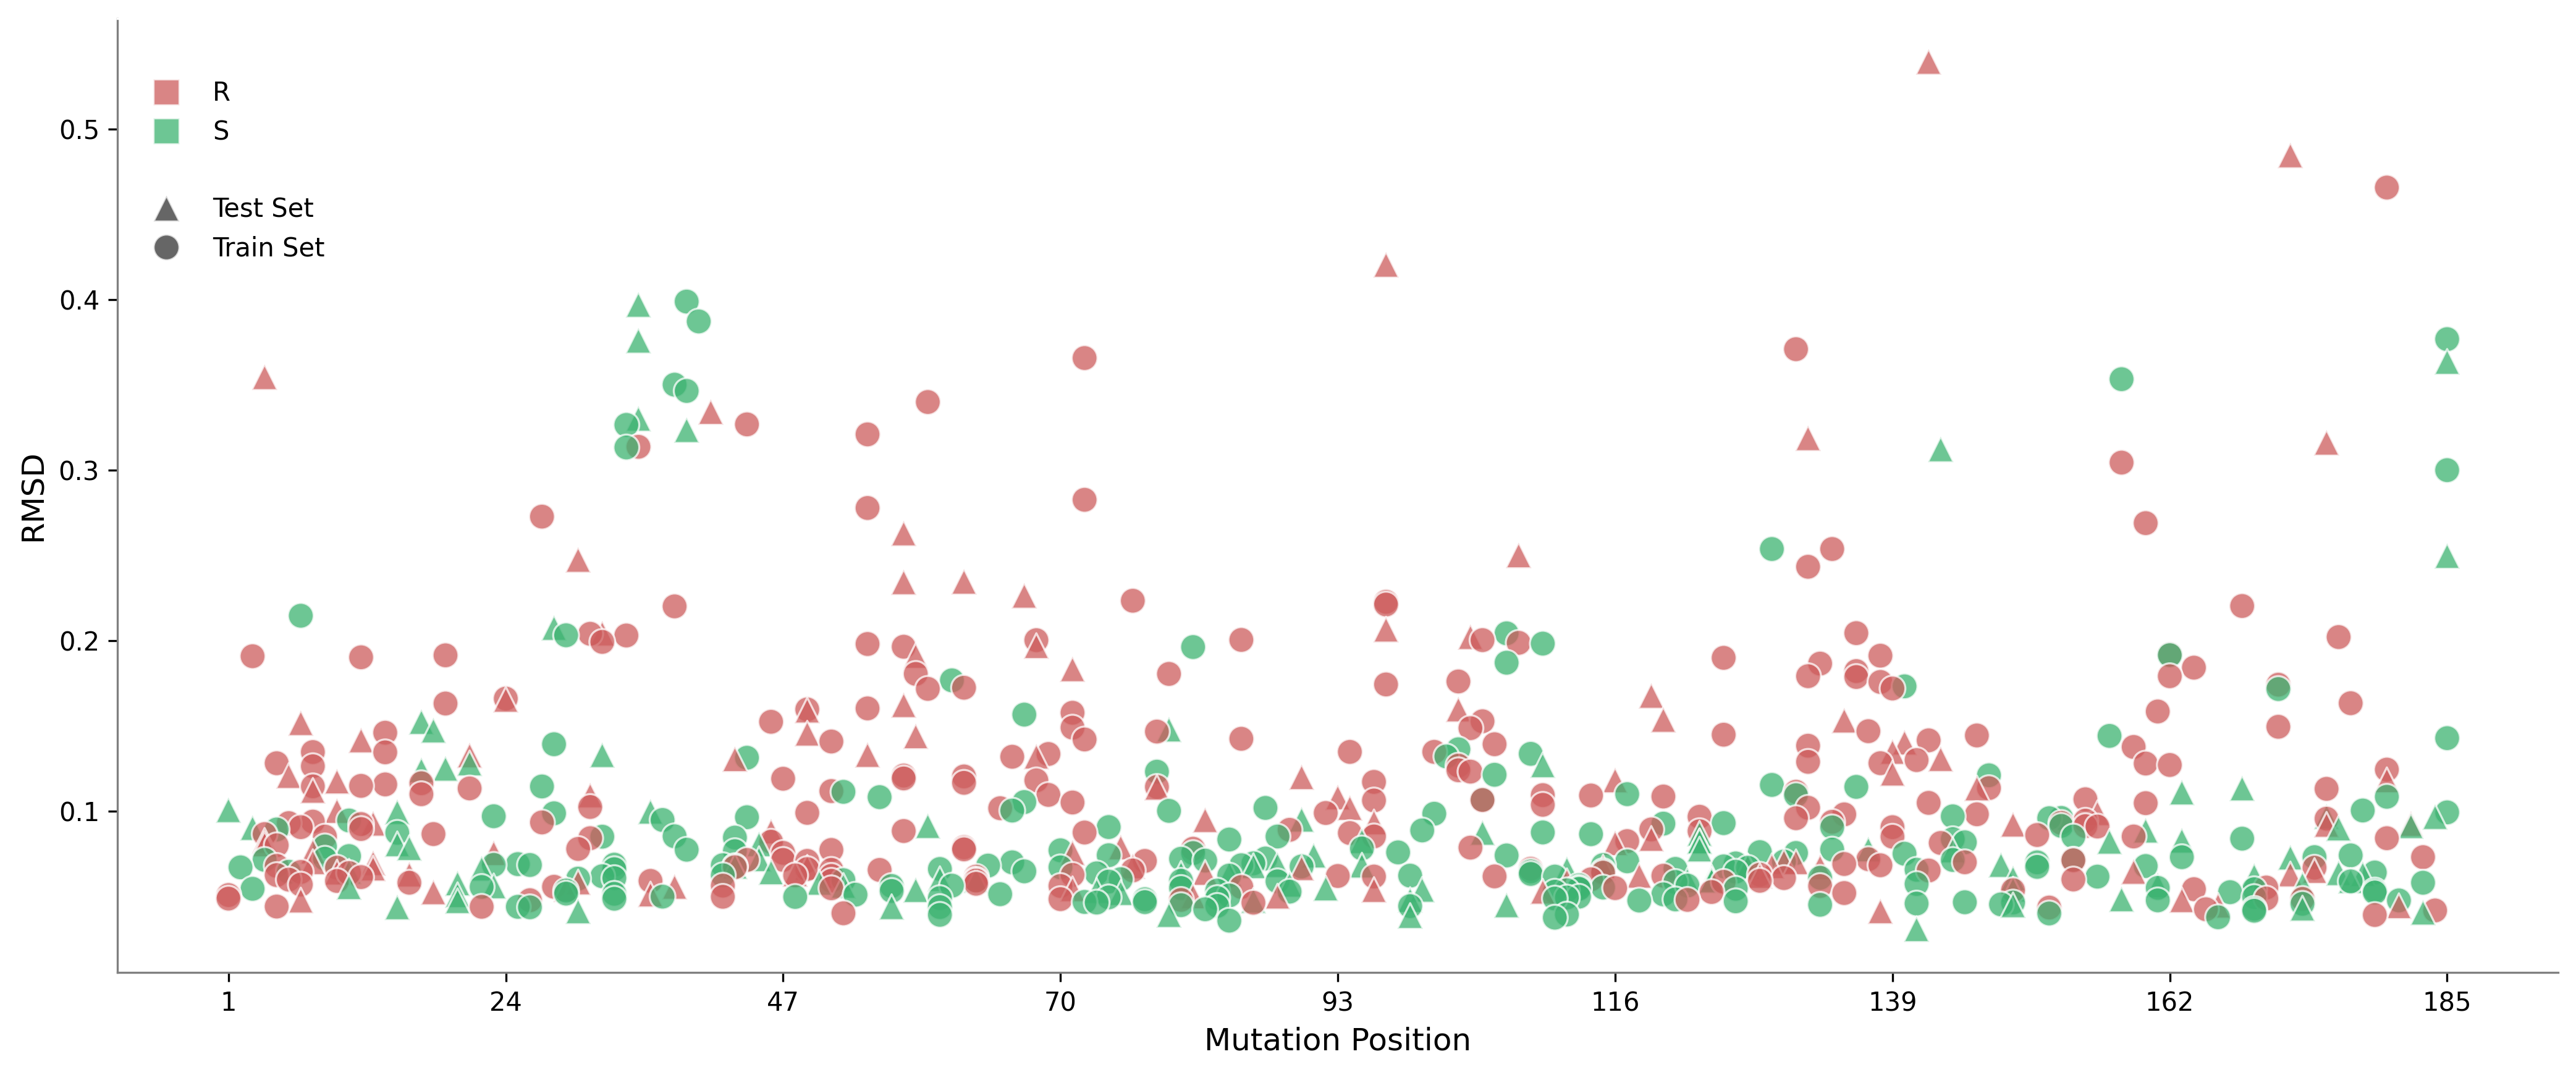

In [ ]:
full_set_df_w_mut['mutation_position'] = full_set_df_w_mut['mutation'].str[1:-1].astype(int) # get mutation position

# plt.figure(figsize=(10, 6))
plt.figure(figsize=(14, 5.9))

sns.scatterplot(
    data=full_set_df_w_mut, 
    x='mutation_position', 
    y='RMSD', 
    hue='phenotype_label', 
    style='Dataset', 
    markers={'Train Set': 'o', 'Test Set': '^'}, 
    s=100, 
    palette={'S': 'mediumseagreen', 'R': 'indianred'},
    alpha=0.75,
    )

# plt.yticks(ticks=np.arange(0, 0.6, 0.05))
plt.yticks(ticks=np.arange(0.1, 0.6, 0.1))
plt.xticks(ticks=np.arange(1, 187, step=23))
plt.xlabel('Mutation Position')
plt.ylabel('RMSD')
# plt.title('RMSD vs Mutation Position')

# legend = plt.legend(title='Phenotype / Dataset')
legend = plt.legend(title='')
legend.set_frame_on(False)
legend.get_texts()[0].set_text('Phenotype')
legend.get_texts()[0].set_visible(False)
legend.get_texts()[3].set_visible(False)


legend.legend_handles[0].set_visible(False)
for handle in legend.legend_handles[1:3]:
    handle.set_marker('s')  # square marker type


# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


plt.tight_layout()

# plt.savefig("figs/rmsd_vs_mutation_position_v3.png", dpi=300, bbox_inches='tight')

plt.show()